In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [9]:
!pip install openpyxl

In [7]:
df= pd.read_excel('Sales_Performance_Data.xlsx')

In [10]:
print(df.head())

   Order ID Region Salesperson Product        Date  Units Sold  Unit Price  \
0      1001  South       Diana  Laptop  2024-02-10          43         287   
1      1002   West       Alice  Tablet  2024-02-21          42         542   
2      1003   West       Alice  Tablet  2024-04-12          24         264   
3      1004   East     Charlie   Phone  2024-01-08          27         844   
4      1005  South         Bob  Tablet  2024-03-18          23         563   

   Total Sales  
0        12341  
1        22764  
2         6336  
3        22788  
4        12949  


In [11]:
print(df.dtypes)

Order ID        int64
Region         object
Salesperson    object
Product        object
Date           object
Units Sold      int64
Unit Price      int64
Total Sales     int64
dtype: object


In [12]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Order ID       0
Region         0
Salesperson    0
Product        0
Date           0
Units Sold     0
Unit Price     0
Total Sales    0
dtype: int64


In [13]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")



Number of duplicate rows: 0


In [15]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Order ID                 Date  Units Sold   Unit Price   Total Sales
count   100.000000                  100   100.00000   100.000000    100.000000
mean   1050.500000  2024-02-22 12:57:36    28.89000   599.590000  17120.250000
min    1001.000000  2024-01-01 00:00:00     5.00000   201.000000   1932.000000
25%    1025.750000  2024-01-23 00:00:00    19.00000   418.000000   7797.750000
50%    1050.500000  2024-02-18 12:00:00    27.00000   605.000000  16962.000000
75%    1075.250000  2024-03-27 00:00:00    40.00000   801.250000  24412.500000
max    1100.000000  2024-04-30 00:00:00    50.00000  1000.000000  41350.000000
std      29.011492                  NaN    12.78011   235.873494  10115.862445


In [14]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract 'Month' as new column
df['Month'] = df['Date'].dt.to_period('M').astype(str)

## 1.Which region generated the highest total sales during the reporting period.


Total Sales by Region:
 Region
West     495360
South    421355
East     420177
North    375133
Name: Total Sales, dtype: int64


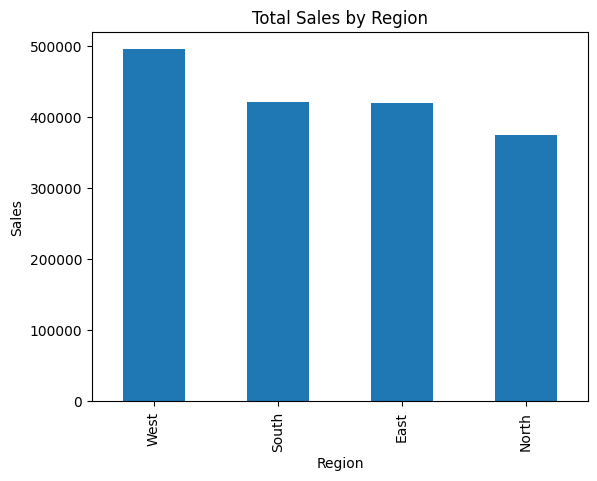

In [16]:
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:\n", region_sales)
region_sales.plot(kind='bar', title='Total Sales by Region', ylabel='Sales', xlabel='Region')
plt.show()

## 2.How do total sales compare across different salespersons, and who were the top 3 performers?


Top 3 Salespersons:
 Salesperson
Charlie    493656
Diana      453246
Bob        403553
Name: Total Sales, dtype: int64


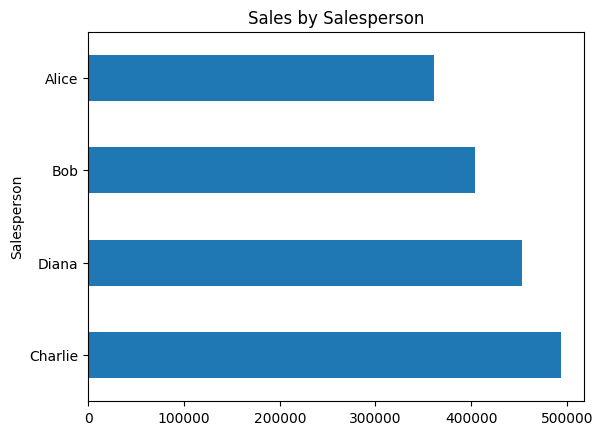

In [17]:
sales_by_person = df.groupby('Salesperson')['Total Sales'].sum().sort_values(ascending=False)
print("\nTop 3 Salespersons:\n", sales_by_person.head(3))
sales_by_person.plot(kind='barh', title='Sales by Salesperson')
plt.show()

## 3.What are the monthly sales trends for each product category, and which product showed the most consistent growth?

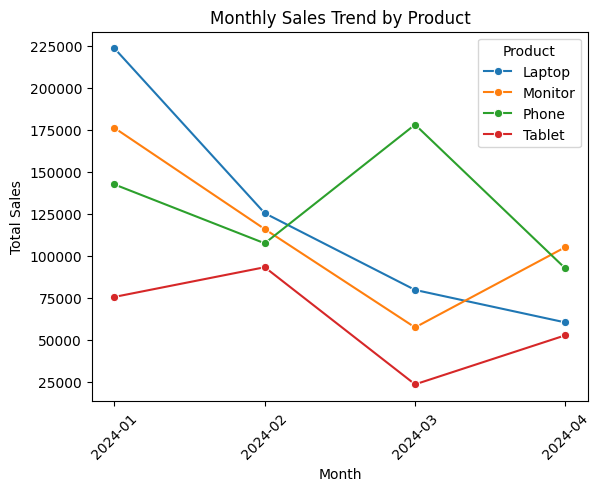

In [18]:
monthly_trend = df.groupby(['Month', 'Product'])['Total Sales'].sum().reset_index()
sns.lineplot(data=monthly_trend, x='Month', y='Total Sales', hue='Product', marker='o')
plt.title('Monthly Sales Trend by Product')
plt.xticks(rotation=45)
plt.show()

## 4.Is there a significant difference in sales performance between regions in terms of units sold and revenue generated?

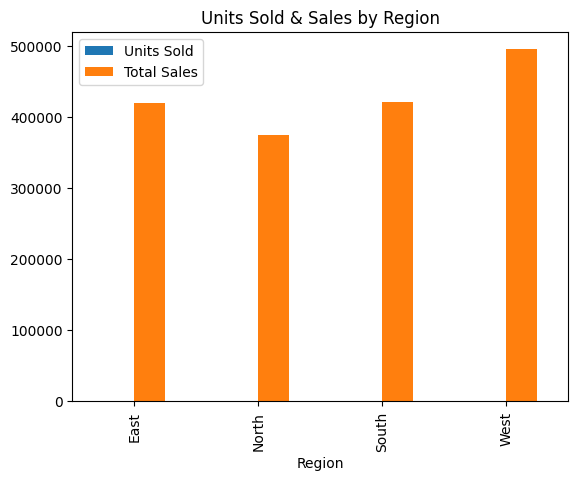

In [19]:
region_summary = df.groupby('Region')[['Units Sold', 'Total Sales']].sum()
region_summary.plot(kind='bar', title='Units Sold & Sales by Region')
plt.show()

## 5.Which products had the highest and lowest average unit prices, and how did this affect overall sales revenue?


Average Price vs Sales:
          Avg Unit Price  Total Sales
Product                             
Phone        664.750000       521312
Laptop       617.640000       489702
Monitor      559.700000       455344
Tablet       536.117647       245667


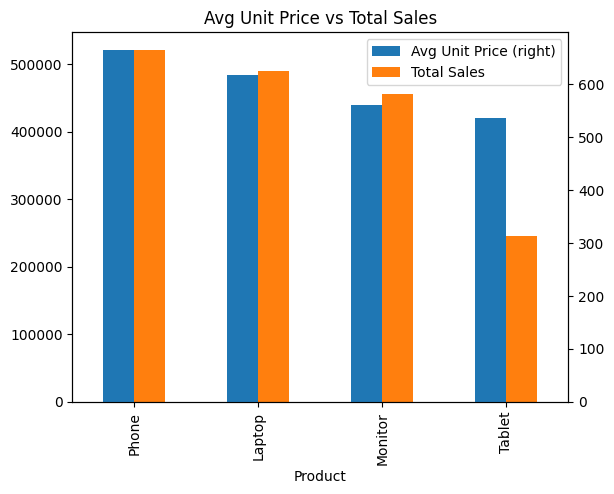

In [20]:
avg_price = df.groupby('Product')['Unit Price'].mean().sort_values(ascending=False)
total_sales = df.groupby('Product')['Total Sales'].sum()
price_vs_sales = pd.concat([avg_price, total_sales], axis=1)
price_vs_sales.columns = ['Avg Unit Price', 'Total Sales']
print("\nAverage Price vs Sales:\n", price_vs_sales)
price_vs_sales.plot(kind='bar', secondary_y='Avg Unit Price', title='Avg Unit Price vs Total Sales')
plt.show()

## 6.How do total sales and units sold fluctuate based on different combinations of region and product?

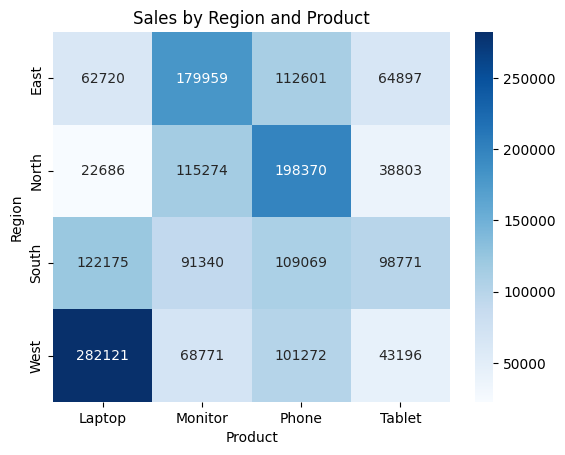

In [21]:
pivot = df.pivot_table(values='Total Sales', index='Region', columns='Product', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sales by Region and Product")
plt.show()

## 7.Which month experienced the highest total sales, and what product or region dominated during that month?


Best Month: 2024-01 with sales = 618459


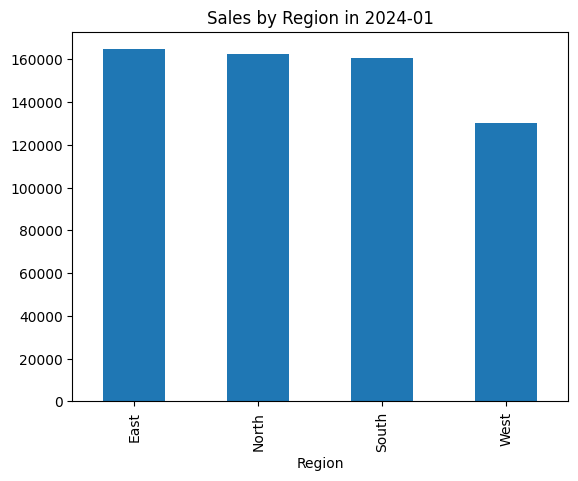

In [22]:
monthly_sales = df.groupby('Month')['Total Sales'].sum()
top_month = monthly_sales.idxmax()
print(f"\nBest Month: {top_month} with sales = {monthly_sales.max()}")
df[df['Month'] == top_month].groupby('Region')['Total Sales'].sum().plot(kind='bar', title=f'Sales by Region in {top_month}')
plt.show()